# Support Vector Machines

In [11]:
from sklearn import tree,neighbors,datasets,svm
from sklearn.utils import check_random_state
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
import cPickle
import numpy as np
from sklearn.externals.six import StringIO
import pydot
import matplotlib.pyplot as plt
import pylab as pl
from arftools import *
import warnings
%matplotlib inline

In [2]:
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

## SVM and Grid Search

### Kernels

In [5]:
def plusieursNoyaux():
    data,target = gen_arti(data_type=0,epsilon=0.02)
    testData,testTarget = gen_arti(data_type=0,epsilon=0.02)
    for i in ('linear','gaussian','polynomial'):
        if i == 'gaussian':
            clf = svm.SVC(C=1.0,kernel='rbf')
        elif i == 'polynomial':
            clf = svm.SVC(C=1.0,kernel='poly')
        else:
            clf = svm.SVC(C=1.0,kernel=i)
        clf.fit(data,target)
        clf.decision_function(testData)
        plt.Figure()
        plot_data(testData,testTarget)
        plot_frontiere(data,clf.decision_function)
        plt.title("SVM with "+ i +" kernel")
        plt.show()

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

### Parameters of Linear Kernel

In [4]:
def plusieursParametresDuNoyauLineaire():
    data,target = gen_arti(data_type=0,epsilon=0.02)
    testData,testTarget = gen_arti(data_type=0,epsilon=0.02)
    for i in (1, 10, 100, 1000):
        clf = svm.SVC(C=i,kernel='linear')
        clf.fit(data,target)
        clf.decision_function(testData)
        plt.Figure()
        plot_data(testData,testTarget)
        plot_frontiere(data,clf.decision_function)
        plt.title("SVM with linear kernel and C = " + str(i))
        plt.show()

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

### Parameters of Gaussian Kernel

In [6]:
def plusieursParametresDuNoyauGaussien():
    data,target = gen_arti(data_type=0,epsilon=0.02)
    testData,testTarget = gen_arti(data_type=0,epsilon=0.02)
    for i in np.arange(0.1,1,0.2):
        clf = svm.SVC(gamma=i,kernel='rbf')
        clf.fit(data,target)
        clf.decision_function(testData)
        plt.Figure()
        plot_data(testData,testTarget)
        plot_frontiere(data,clf.decision_function)
        plt.title("SVM with gaussian kernel and gamma = " + str(i))
        plt.show()

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

### Parameters of Polynomial Kernel 

In [7]:
def plusieursParametresDuNoyauPoly():
    data,target = gen_arti(data_type=0,epsilon=0.02)
    testData,testTarget = gen_arti(data_type=0,epsilon=0.02)
    for i in (1,3,5,7,9,11):
        clf = svm.SVC(degree=i,kernel='poly')
        clf.fit(data,target)
        clf.decision_function(testData)
        #print clf.support_vectors_ 
        plt.Figure()
        plot_data(testData,testTarget)
        plot_frontiere(data,clf.decision_function)
        plt.title("SVM with polynomial kernel and degree = " + str(i))
        plt.show()

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [9]:
def trouverLesMeilleursParams():
    X,y = gen_arti(data_type=0,epsilon=0.02)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
    tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                    {'kernel':['poly'], 'degree':[3,5,7,9], 'C': [1, 10, 100, 1000]}]
    clf = GridSearchCV(SVC(), tuned_parameters, cv=5)
    clf.fit(X_train, y_train)
    print("\nBest parameters set found on development set:")
    print(clf.best_estimator_)
    print("\nGrid scores on development set:")
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r" % (mean_score, scores.std() / 2, params))
    
    gamma_rbf_c_1, erreur_rbf_c_1, gamma_rbf_c_10, erreur_rbf_c_10, gamma_rbf_c_100, erreur_rbf_c_100, gamma_rbf_c_1000, erreur_rbf_c_1000 = [],[],[],[],[],[],[],[]
    c_linear, erreur_linear = [],[]
    degree_poly_c_1,erreur_poly_c_1,degree_poly_c_10,erreur_poly_c_10,degree_poly_c_100,erreur_poly_c_100,degree_poly_c_1000,erreur_poly_c_1000 = [],[],[],[],[],[],[],[]
    for params, mean_score, scores in clf.grid_scores_:
        if params['kernel'] == 'rbf':
            if params['C'] == 1:
                gamma_rbf_c_1.append(params['gamma'])
                erreur_rbf_c_1.append(1-mean_score)
            if params['C'] == 10:
                gamma_rbf_c_10.append(params['gamma'])
                erreur_rbf_c_10.append(1-mean_score)
            if params['C'] == 100:
                gamma_rbf_c_100.append(params['gamma'])
                erreur_rbf_c_100.append(1-mean_score)
            if params['C'] == 1000:
                gamma_rbf_c_1000.append(params['gamma'])
                erreur_rbf_c_1000.append(1-mean_score)
        if params['kernel'] == 'linear':
            c_linear.append(params['C'])
            erreur_linear.append(1-mean_score)
        if params['kernel'] == 'poly':
            if params['C'] == 1:
                degree_poly_c_1.append(params['degree'])
                erreur_poly_c_1.append(1-mean_score)
            if params['C'] == 10:
                degree_poly_c_10.append(params['degree'])
                erreur_poly_c_10.append(1-mean_score)
            if params['C'] == 100:
                degree_poly_c_100.append(params['degree'])
                erreur_poly_c_100.append(1-mean_score)
            if params['C'] == 1000:
                degree_poly_c_1000.append(params['degree'])
                erreur_poly_c_1000.append(1-mean_score)
      
    
    plt.plot(gamma_rbf_c_1,erreur_rbf_c_1)
    plt.title("SVM with gaussian kernel and C = 1")
    plt.xlabel("gamma")
    plt.ylabel("erreur")
    plt.show()
    
    plt.plot(gamma_rbf_c_10,erreur_rbf_c_10)
    plt.title("SVM with gaussian kernel and C = 10")
    plt.xlabel("gamma")
    plt.ylabel("erreur")
    plt.show()
    
    plt.plot(gamma_rbf_c_100,erreur_rbf_c_100)
    plt.title("SVM with gaussian kernel and C = 100")
    plt.xlabel("gamma")
    plt.ylabel("erreur")
    plt.show()
    
    plt.plot(gamma_rbf_c_1000,erreur_rbf_c_1000)
    plt.title("SVM with gaussian kernel and C = 1000")
    plt.xlabel("gamma")
    plt.ylabel("erreur")
    plt.show()
    
    plt.plot(c_linear,erreur_linear)
    plt.title("SVM with linaer kernel")
    plt.xlabel("C")
    plt.ylabel("erreur")
    plt.show()
    
    plt.plot(degree_poly_c_1,erreur_poly_c_1)
    plt.title("SVM with polynomial kernel and C = 1")
    plt.xlabel("degree")
    plt.ylabel("erreur")
    plt.show()
    
    plt.plot(degree_poly_c_10,erreur_poly_c_10)
    plt.title("SVM with polynomial kernel and C = 10")
    plt.xlabel("degree")
    plt.ylabel("erreur")
    plt.show()
    
    plt.plot(degree_poly_c_100,erreur_poly_c_100)
    plt.title("SVM with polynomial kernel and C = 100")
    plt.xlabel("degree")
    plt.ylabel("erreur")
    plt.show()
    
    plt.plot(degree_poly_c_1000,erreur_poly_c_1000)
    plt.title("SVM with polynomial kernel and C = 1000")
    plt.xlabel("degree")
    plt.ylabel("erreur")
    plt.show()


Best parameters set found on development set:
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Grid scores on development set:
1.000 (+/-0.000) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.505 (+/-0.001) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
1.000 (+/-0.000) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
1.000 (+/-0.000) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.0001}
1.000 (+/-0.000) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.001}
1.000 (+/-0.000) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.0001}
1.000 (+/-0.000) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}
1.000 (+/-0.000) for {'kernel': 'rbf', 'C': 1000, 'gamma': 0.0001}
1.000 (+/-0.000) for {'kernel': 'linear', 'C': 1}
1.000 (+/-0.000) for {'kernel': 'linear', 'C': 10}
1.000 (+/-0.000) for {'kernel': 'linear', 'C': 100}
1.000 (+/-0.000) for {'ker

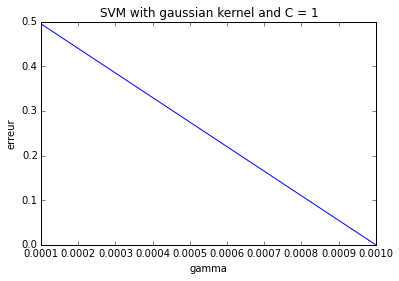

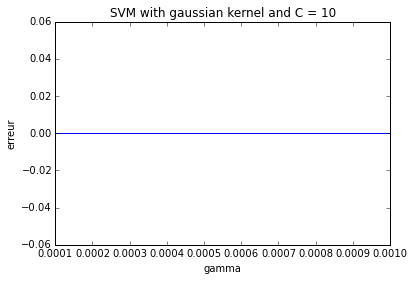

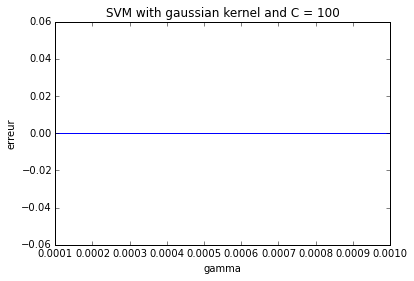

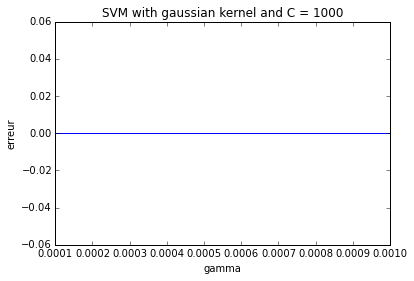

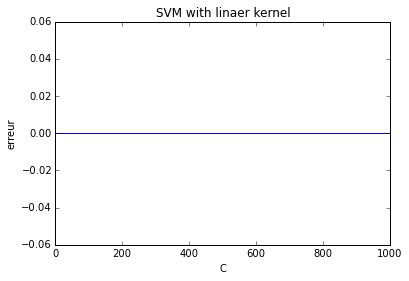

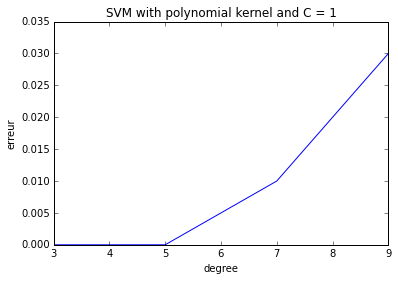

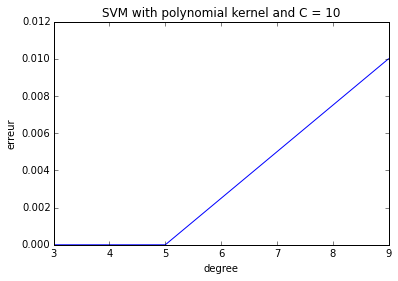

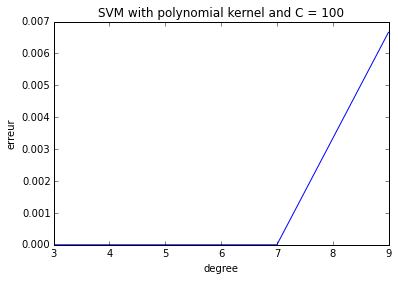

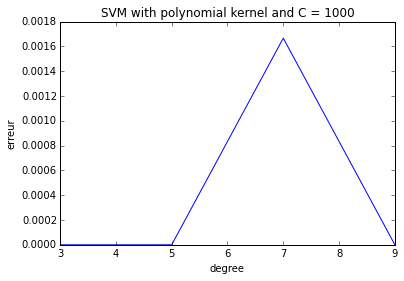

In [12]:
trouverLesMeilleursParams()

## Multi-class Classification

### One-versus-one 

In [13]:
def oneVsOne():
    digits = datasets.load_digits()
    data = digits.data
    target = digits.target
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=0)
    ovo = OneVsOneClassifier(LinearSVC(random_state=0))
    ovo.fit(X_train,y_train)
    print 'one vs one : '
    print ovo.predict(X_test)
    print ("The score of One-VS-One classsification is %0.3f" % ovo.score(X_test,y_test))

In [14]:
oneVsOne()

one vs one : 
[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 8 3
 4 8 9 7 9 8 2 1 5 2 5 8 4 1 7 0 6 1 5 5 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 8 7 2 0 9 6 0 4 2 0 7 9 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 8 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 8 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 8 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 2 1 5 5 9 1 3 7 0 0 9 0 4 5 9 3 3 4 3 1 8 9 8 3 6 2 1 6 2
 1 7 5 5 1 9 2 8 9 7 2 1 4 9 3 2 6 2 5 9 6 5 8 2 0 7 8 0 6 8 4 1 8 6 4 3 4
 2 0 4 5 8 

### One-versus-all

In [15]:
def oneVsAll():
    digits = datasets.load_digits()
    data = digits.data
    target = digits.target
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=0)
    ova = OneVsRestClassifier(LinearSVC(random_state=0))
    ova.fit(X_train,y_train)
    print '\none vs all : '
    print ova.predict(X_test)
    print ("The score of One-VS-All classsification is %0.3f" % ova.score(X_test,y_test))

In [16]:
oneVsAll()


one vs all : 
[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 8 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 1 2 2 9 7 1 3 6 0 5 5 7 5 1 2 9 9 3 1 4 7 4 8 5 9 5 5 2 6 9 0 7 1 4 4 3
 4 8 9 7 9 8 2 4 5 2 5 8 4 1 7 0 6 1 5 5 9 9 5 9 9 5 7 5 6 1 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 3 6 1 0 4 1 6 3 8 6 7 4 1 6 9 0
 9 3 3 0 7 7 5 7 8 0 7 1 9 6 4 1 0 1 4 6 4 3 3 0 9 5 3 2 1 4 2 1 6 9 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 3 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 3 3 7 2 7 5 5 7
 0 9 1 6 1 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 8 7 2 0 9 6 0 4 2 0 7 9 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 9 9
 5 6 2 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 1 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 2 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 1 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 9 3 2 6 5 5 9 1 3 7 1 0 7 0 4 5 0 9 3 4 3 1 8 9 8 3 6 3 1 6 2
 1 7 5 5 1 9 2 8 9 7 2 8 4 3 3 2 6 2 5 9 6 5 8 2 0 7 3 0 6 8 4 1 8 6 4 3 1
 2 0 4 5 8